# Linear Systems

## 1. LU Decomposition 

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Forward Substitution

If the matrix $A$ is lower triangular matrix $L$, that is 

$$Lx = b = 
\begin{pmatrix}
l_{11}&  & O \\
\vdots & \ddots & \\
l_{n1} & \dots & l_{nn} 
\end{pmatrix}
\begin{pmatrix}
x_1 \\
\vdots \\
x_n
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\
\vdots \\
b_n
\end{pmatrix}
$$

It's easy to find that 

$$
\begin{aligned}
x_1 &= b_1 / l_{11} \\
x_2 &= (b_2 - l_{21}x_1) / l_{22} \\
&\vdots \\
x_i &= (b_i - \sum_{j=1}^{i-1} l_{ij}x_j)/l_{ii}
\end{aligned}
$$

In [2]:
def forward_substitution(L, b):
    '''
    Arguments:
        L : 2D lower triangular np.array
        b : 1D np.array

    Return:
        x : solution to Lx = b
    '''

    m, n = L.shape
    x = np.zeros(n) 
    for i in range(n): 
        r = sum([L[i ,j]* x[j] for j in range(i)]) 
        x[i] = (b[i] - r) / L[i, i]
    return x

### Backward Substitution

If the matrix $A$ is upper triangular matrix $U$, that is 

$$Ux = b = 
\begin{pmatrix}
u_{11} & \dots & u_{1n} \\
 & \ddots & \vdots \\
O &  & u_{nn} 
\end{pmatrix}
\begin{pmatrix}
x_1 \\
\vdots \\
x_n
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\
\vdots \\
b_n
\end{pmatrix}
$$

It's easy to find that 

$$
\begin{aligned}
x_n &= b_n / u_{nn} \\
x_{n-1} &= (b_{n-1} - u_{n-1,n}x_n) / u_{n-1,n-1} \\
&\vdots \\
x_i &= (b_i - \sum_{j=i+1}^{n} u_{ij}x_j)/u_{ii}
\end{aligned}
$$

In [3]:
def backward_substitution(R, b):
    '''
    Arguments:
        R : 2D upper triangular np.array
        b : 1D np.array

    Return:
        x : solution to Rx = b
    '''
    m, n = R.shape
    x = np.zeros(n)
    for i in reversed(range(n)): 
        r = sum([R[i, j] * x[j] for j in range(i, n)])
        x[i] = (b[i] - r) / R[i, i]
    return x

### Gaussian Elimination

In [4]:
def gaussian_elimination(
    A,
    b
):
    '''
    Input:
    A : m x m matrix
    b : m x 1 vector
    
    Return:
    L : m x m lower-triangular matrix
    U : m x m upper-triangular matrix
    x : m x 1 solution
    '''

    U = np.copy(A)
    m = len(A)  
    L = np.diag(np.ones(m)) 
    x = np.zeros([m,1])  
    new_b = np.copy(b) 
    
    #Gaussian elimination
    for k in range(m-1): 
        new_L = np.diag(np.ones(m))
        for j in range(k+1, m):
            new_L[j, k] = -U[j,k] / U[k,k]
            U[j,k:] = U[j, k:] + new_L[j, k]*U[k, k:]
            new_b[j, 0] = new_b[j, 0] + new_L[j, k]*new_b[k, 0]
        L = new_L@L 
        
    #Solve x 
    for i in range(m):
        if i==0:  
            x[-1, 0] = new_b[-1, 0] / U[-1, -1]  
        else:
            x[-1-i, 0] = (new_b[-1-i, 0] - U[-1-i, -i:]@x[-i:,0])/U[-1-i, -1-i] 
                          
    return LA.inv(L), U, x  

### Example

 Consider the following linear system.
 $$\begin{matrix}
    &2x + y - z = 8\\
    &-3x - y + 2z = -11\\
    &-2x + y + 2z = -3
    \end{matrix}$$

In [5]:
A = np.array([
    [2., 1., -1.],
    [-3., -1., 2.],
    [-2., 1., 2.]
])

b = np.array([
    [8.],
    [-11.],
    [-3.]
])

L, U, x = gaussian_elimination(A, b)
print("L =", L)
print("U =", U)
print("x =", x)

L = [[ 1.  -0.  -0. ]
 [-1.5  1.  -0. ]
 [-1.   4.   1. ]]
U = [[ 2.   1.  -1. ]
 [ 0.   0.5  0.5]
 [ 0.   0.  -1. ]]
x = [[ 2.]
 [ 3.]
 [-1.]]


## 2. Cholesky Factorization 

In [6]:
def cholesky_decomposition(A):
    '''
    Arguments:
        A : 2D np.array

    Return:
        R : 2D np.array, A = R^T R
    '''

    m = len(A) 
    R = np.zeros((m,m))
    
    R[0,0] = np.sqrt(A[0,0])  
    for j in range(1,m):
        R[0,j] = A[0,j]/R[0,0]
        
    for i in range(m):    
        R[i,i] = np.sqrt(A[i,i] - sum((R[k,i])**2 for k in range(i))) 
        for j in range(i+1, m):
            R[i,j] = (A[i,j] - sum(R[k,i]*R[k,j] for k in range(i)))/R[i,i]
            
    return R


### Example 1

In [7]:
# Construct a PSD matrix A
_A = np.array([
    [1, 3, 2, 4],
    [4, 2, 1, 7],
    [2, 5, 9, 0],
    [3, 5, 8, 2]
])
A = _A.T @ _A

# Do Cholesky decomposition
R = cholesky_decomposition(A)
print('A:\n', A)
print('R:\n', R)
print('A = R.T @ R:\n', R.T @ R)

A:
 [[ 30  36  48  38]
 [ 36  63  93  36]
 [ 48  93 150  31]
 [ 38  36  31  69]]
R:
 [[ 5.47722558  6.57267069  8.76356092  6.93781906]
 [ 0.          4.44971909  7.95555838 -2.15743956]
 [ 0.          0.          3.14787085 -4.01425733]
 [ 0.          0.          0.          0.31282475]]
A = R.T @ R:
 [[ 30.  36.  48.  38.]
 [ 36.  63.  93.  36.]
 [ 48.  93. 150.  31.]
 [ 38.  36.  31.  69.]]


### Example 2

 Suppose that a planet follows an elliptical orbit, which can be represented in a Cartesian coordinate system by the equation of the form

 $$\alpha_{1} y^{2} + \alpha_{2} x y + \alpha_{3} x + \alpha_{4} y + \alpha_{5} = x^{2}.\ \ \ \ \ \ \ \ \ (1)$$

 Based on the observation of the planet's position:

 $$    \left [
      \begin{array}{c}
       x \\
       y
      \end{array}
    \right ] =
    \left [
      \begin{array}{cccccccccc}
   1.02 & 0.95 & 0.87 & 0.77 & 0.67 & 0.56 & 0.44 & 0.30 & 0.16 & 0.01\\
   0.39 & 0.32 & 0.27 & 0.22 & 0.18 & 0.15 & 0.13 & 0.12 & 0.13 & 0.15
      \end{array}
    \right ],$$
   
   we want to determine the orbital parameters $\alpha_{i}$, $i=1,2,\cdots, 5$, that solve the linear least squares problem of the form: $\min_{\alpha_{i}} \| b - A\alpha \|_{2}$, where the vector $b \in \mathbb{R}^{10}$, $\alpha = [\alpha_1, \alpha_2, \alpha_3, \alpha_4, \alpha_5]^{T}\in \mathbb{R}^{5}$ and the matrix $A \in \mathbb{R}^{10\times 5}$ can be obtained easily when we substitute the aboe data to the  equation (1). 
   
   Find the solution of the problem by solving the associated normal equations via Cholesky factorization.

In [8]:
data_x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01])
data_y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15])

In [9]:
def construct_A_and_b(x, y):
    '''
    Arguments:
        x : 1D np.array, data x
        y : 1D np.array, data y

    Returns:
        A : 2D np.array
        b : 1D np.array
    '''
    m = len(x)
    A = np.zeros((m,5))
    A[:,0] = y**2
    A[:,1] = x*y
    A[:,2] = x
    A[:,3] = y
    A[:,4] = 1
    
    b = np.zeros(m)
    b = x**2
    
    return A, b

In [10]:
def solve_alpha(x, y):
    '''
    Arguments:
        x : 1D np.array, data x
        y : 1D np.array, data y

    Returns:
        alpha : 1D np.array

    Hints:
        1. Find matrix A, vector b
        2. Find the associated normal equation
        3. Do Cholesky decomposition
        4. Solve the equation with forward/backward substition
    '''

    A, b = construct_A_and_b(x, y)
    R = cholesky_decomposition(A.T @ A)
    new_b = A.T @ b
    #Solve R.T@w=new_b where R.T is lower triangular
    w = forward_substitution(R.T, new_b)
    #Solve R@alpha=w where R is upper triangular
    alpha = backward_substitution(R, w)
    
    return alpha

In [11]:
alpha = solve_alpha(data_x, data_y)

In [12]:
def ellipse(x, y, alpha):
    '''
    Arguments:
        x : 1D np.array, data x
        y : 1D np.array, data y
        alpha : 1D np.array, the coefficients

    Returns:
        z : 1D np.array, z=f(x, y, alpha) from equation (1)
    '''
    m = len(y)
    z = alpha[0]*y**2 + alpha[1]*x*y + alpha[2]*x + alpha[3]*y + alpha[4]*np.ones(m) - x**2
    return z

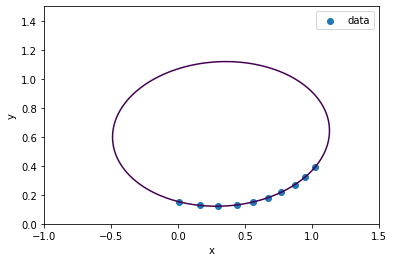

In [13]:
# Plot the exact data points (x,y)
plt.scatter(data_x, data_y, label='data')

# Prepare mesh data points (X,Y) to plot the orbit
X, Y = np.meshgrid(
    np.linspace(-1, 1.5, 100),
    np.linspace(0, 1.5, 100)
)
# Plot the level curve at z = 0 only
plt.contour(X, Y, ellipse(X, Y, alpha), [0])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 3. Iterative Methods (Jacobian method and Gauss-Seidel method)

### Iterative Methods for Linear Systems $Ax=b$
We split A s.t. $A=M-N$, and let $Mx_{n+1}=Nx_n+b$  
Suppose $\bar{x}$ is the exact solution to $Ax=b$, then
$$e_{n+1} = x_{n+1}-\bar{x}=M^{-1}Nx_n+M^{-1}b-\bar{x}=M^{-1}Nx_n+M^{-1}(M-N)\bar{x}-\bar{x}=M^{-1}N(x_n-\bar{x})=M^{-1}Ne_n$$
Let $G=M^{-1}N$, then $$e_{n+1}=Ge_n$$
The condition for $lim_{n \to \infty} \|e_n\|=0$ is the spectal radius of $G$ is smaller than 1, that is
$${\cal S}(G)=max |\lambda_i |<1,$$ where $\lambda_i$ are eigenvalues of $G$    

In Jacobian method, $M=D$ and $N=-L-U$  
In Gauss-Seidel method, $M=D+L$ and $N=-U$



### Example 1
Let $$A=\left[\begin{matrix}
    1 &&0 &&1\\
    0 && 3 &&0\\
    2 &&5 && 6
    \end{matrix}\right],\,
    b=\left[\begin{matrix}
    4\\
    6\\
    30
    \end{matrix}\right], \text{and the actual solution } \bar{x} \text{ is} \left[\begin{matrix}1\\2\\3\end{matrix}\right] $$

In [14]:
#Jacobian Method
M_J = np.array([
    [1, 0, 0],
    [0, 3, 0],
    [0, 0, 6]])
N_J = np.array([
    [0, 0, -1],
    [0, 0, 0],
    [-2, -5, 0]])
b = np.array([
    [4],
    [6],
    [30]])
real_x = np.array([
    [1],
    [2],
    [3]])
initial = np.array([
    [1],
    [1],
    [1]])
x_J = []
r_J = []
x_J.append(initial)
r_J.append(LA.norm(x_J[0]-real_x,2))
M_J_inv = LA.inv(M_J)

m=30
for i in range(m):
    new_x = M_J_inv@N_J@x_J[i]+M_J_inv@b
    x_J.append(new_x)
    r_J.append(LA.norm(x_J[i+1]-real_x,2))
    
print(r_J)

[2.23606797749979, 2.1666666666666665, 1.0671873729054748, 0.722222222222222, 0.35572912430182463, 0.2407407407407404, 0.11857637476727488, 0.08024691358024687, 0.03952545825575822, 0.02674897119341546, 0.013175152751919546, 0.008916323731138522, 0.004391717583973529, 0.002972107910379564, 0.001463905861324533, 0.000990702636793222, 0.0004879686204416728, 0.00033023421226419103, 0.00016265620681391404, 0.00011007807075465063, 5.4218735604661136e-05, 3.669269025152744e-05, 1.8072911868359087e-05, 1.2230896750372503e-05, 6.0243039561196955e-06, 4.076965583457501e-06, 2.0081013185216184e-06, 1.3589885276597502e-06, 6.693671064050565e-07, 4.529961758865834e-07, 2.2312236870921202e-07]


In [15]:
#Gauss-Seidel Method
M_G = np.array([
    [1, 0, 0],
    [0, 3, 0],
    [2, 5, 6]])
N_G = np.array([
    [0, 0, -1],
    [0, 0, 0],
    [0, 0, 0]])

x_G = []
r_G = []
x_G.append(initial)
r_G.append(LA.norm(x_G[0]-real_x,2))
M_G_inv = LA.inv(M_G)

for i in range(m):
    new_x = M_G_inv@N_G@x_G[i]+M_G_inv@b
    x_G.append(new_x)
    r_G.append(LA.norm(x_G[i+1]-real_x,2))
    
print(r_G)

[2.23606797749979, 2.108185106778921, 0.7027283689263081, 0.23424278964210407, 0.07808092988070275, 0.02602697662690209, 0.008675658875635248, 0.002891886291879492, 0.0009639620972945685, 0.0003213206990993598, 0.0001071068997010973, 3.5702299901676475e-05, 1.1900766635109248e-05, 3.966922212732926e-06, 1.322307405461398e-06, 4.407691362304549e-07, 1.4692304686129614e-07, 4.897435026447654e-08, 1.632478468539224e-08, 5.441596112219686e-09, 1.8138667750733675e-09, 6.046233818247311e-10, 2.0154234436395486e-10, 6.718218579032223e-11, 2.239518540307946e-11, 7.46627889289678e-12, 2.4901640259502317e-12, 8.312250387865628e-13, 2.783394442230525e-13, 9.39508482332342e-14, 3.258537675748866e-14]


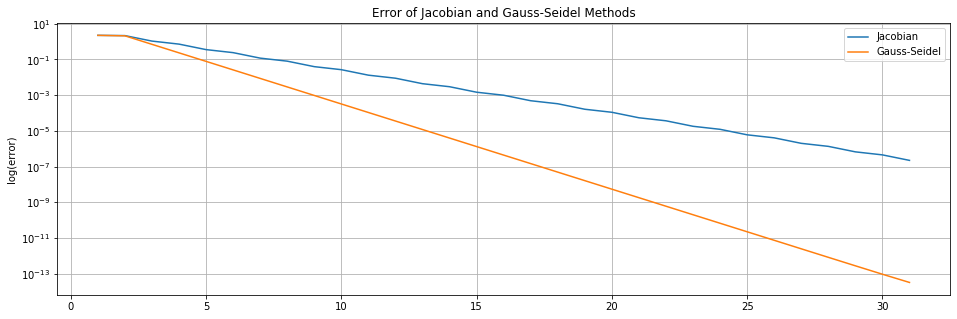

In [16]:
x_range = np.arange(1, m+2, 1)
fig, ax = plt.subplots(figsize=(16, 5))

# Plot the Lagrange interploating polynomial
ax.plot(x_range, r_J, label='Jacobian')
ax.plot(x_range, r_G, label='Gauss-Seidel')

# Add other text and items
ax.set_title('Error of Jacobian and Gauss-Seidel Methods')
plt.legend()
ax.grid(True)
plt.ylabel('log(error)')
ax.set_yscale('log')
#ax.axhline(y=0)
#ax.axvline(x=0)
plt.show()

### Example 2

 Analyse the convergence properties of the Jacobi and Gauss-Seidel methods for the solution of a linear system whose matrix is  
 
 $$\left[\begin{matrix}
    \alpha &&0 &&1\\
    0 &&\alpha &&0\\
    1 &&0 &&\alpha
    \end{matrix}\right],
    \quad \quad
    \alpha \in \mathbb{R}.$$

### Jacobian Method
$$M=D=
    \left[\begin{matrix}
    \alpha &&0 &&0\\
    0 && \alpha &&0\\
    0 &&0 &&\alpha
    \end{matrix}\right], 
    N=-L-U=
    \left[\begin{matrix}
    0 &&0 &&-1\\
    0 && 0 &&0\\
    -1 &&0 &&0
    \end{matrix}\right]$$  
      
      
$$\implies G=-D^{-1}(L+U)=
    \left[\begin{matrix}
    0 &&0 &&{-1\over \alpha}\\
    0 && 0 &&0\\
    {-1\over \alpha} &&0 &&0
    \end{matrix}\right],
    \quad \quad
    \alpha \in \mathbb{R}, \alpha \neq 0.\\
    \implies det(G-\lambda I)=-\lambda^3-(-\lambda)({-1\over \alpha})({-1\over \alpha})=-\lambda(\lambda+{1\over \alpha})(\lambda-{1\over \alpha})$$
Solving $det(G-\lambda I)=0$, and we get the eigenvalues $\lambda=0, {1\over \alpha}, -{1\over \alpha}$  
The iterative method converges when
$${\cal S}(G)=max |\lambda_i |=|{1\over \alpha}|<1 \implies |\alpha|>1 $$

### Gauss-Seidel Method
$$M=D+L=
\left[\begin{matrix}
    \alpha &&0 &&0\\
    0 && \alpha &&0\\
    1 &&0 &&\alpha
    \end{matrix}\right]
    , N=-U=
    \left[\begin{matrix}
    0 &&0 &&-1\\
    0 && 0 &&0\\
    0 &&0 && 0
    \end{matrix}\right]$$  
      
      
$$\implies G=-(D+L)^{-1}U=
    \left[\begin{matrix}
    0 &&0 &&{-1\over \alpha}\\
    0 && 0 &&0\\
    0 &&0 &&{1\over \alpha^2}
    \end{matrix}\right],
    \quad \quad
    \alpha \in \mathbb{R}, \alpha \neq 0.\\
    \implies det(G-\lambda I)=\lambda^2({1\over \alpha^2}-\lambda)$$
Solving $det(G-\lambda I)=0$, and we get the eigenvalues $\lambda=0, 0, {1\over \alpha^2}$  
The iterative method converges when
$${\cal S}(G)=max |\lambda_i |=|{1\over \alpha^2}|={1\over \alpha^2}<1 \implies |\alpha|>1 $$